In [2]:
# Importing key libraries 
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults 
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima # for determining ARIMA orders
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tools.eval_measures import rmse,mse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [4]:
# Load dataset
df = pd.read_excel('Population.xlsx',index_col='Year',parse_dates=True)

In [49]:
#Check loaded dataframe
df.tail()

,Population,d1,d2
Year,,,
2017-01-01,5435343,9091.0,4188.0
2018-01-01,5443120,7777.0,-1314.0
2019-01-01,5450421,7301.0,-476.0
2020-01-01,5457873,7452.0,151.0
2021-01-01,5459781,1908.0,-5544.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29 entries, 1993-01-01 to 2021-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Population  29 non-null     int64
dtypes: int64(1)
memory usage: 464.0 bytes


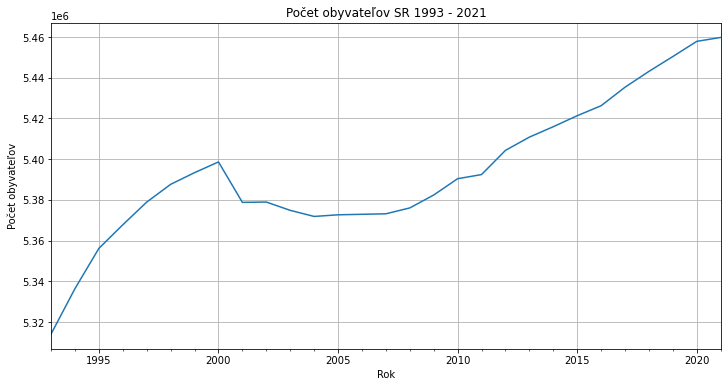

In [7]:
#Data Plot
title = 'Počet obyvateľov SR 1993 - 2021'
xlabel = 'Rok'
ylabel = 'Počet obyvateľov'

ax = df['Population'].plot(figsize=(12,6),title=title,grid=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.autoscale(axis='x',tight=True)

In [8]:
#ACF calculation
acf(df['Population'])

array([ 1.        ,  0.80585826,  0.62694776,  0.47543569,  0.34006872,
        0.23243995,  0.15502328,  0.10357051,  0.08455888,  0.02821979,
       -0.01094374, -0.04001253, -0.07189482, -0.09024704, -0.10192954,
       -0.11670914, -0.13686082, -0.15043304, -0.15370321, -0.17282492,
       -0.18300156, -0.19196565, -0.24343288, -0.28769608, -0.3251681 ,
       -0.33660972, -0.31761292, -0.26462396, -0.15645316])

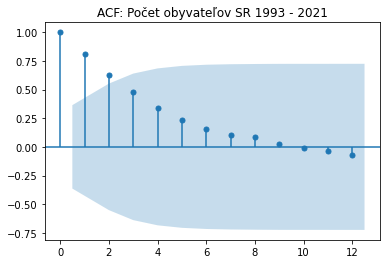

In [9]:
#ACF plot
title = 'ACF: Počet obyvateľov SR 1993 - 2021'
lags = 12
plot_acf(df['Population'],title=title,lags=lags);

In [10]:
#PACF calculation
pacf(df['Population'],nlags=12)

array([ 1.        ,  0.83463891, -0.07658362, -0.0360265 , -0.06877774,
       -0.02101004,  0.00522526,  0.01630358,  0.07534654, -0.21523341,
        0.0061169 , -0.03538455, -0.07552897])

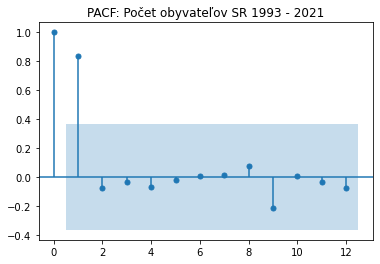

In [11]:
#PACF plot
title = 'PACF: Počet obyvateľov SR 1993 - 2021'
lags = 12
plot_pacf(df['Population'],title=title,lags=lags);

In [12]:
adf_test(df['Population'])

Augmented Dickey-Fuller Test: 
ADF test statistic       0.095597
p-value                  0.965759
# lags used              3.000000
# observations          25.000000
critical value (1%)     -3.723863
critical value (5%)     -2.986489
critical value (10%)    -2.632800
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


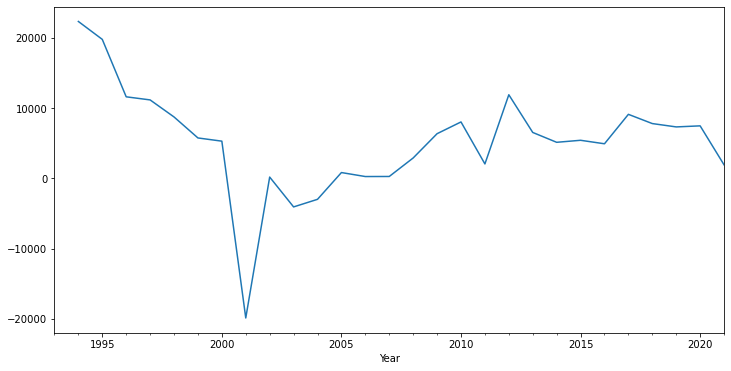

In [13]:
#Differencing data due to non stationarity - 1st difference
df['d1'] = diff(df['Population'],k_diff=1)
df['d1'].plot(figsize=(12,6));

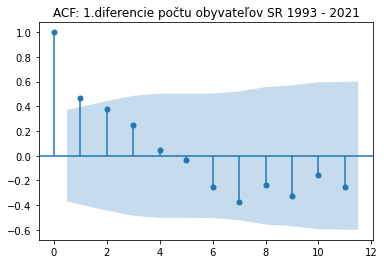

In [14]:
#ACF plot for 1st difference
title='ACF: 1.diferencie počtu obyvateľov SR 1993 - 2021'
lags=12
plot_acf(df['d1'].dropna(),title=title,lags=np.arange(lags));  # be sure to add .dropna() here!

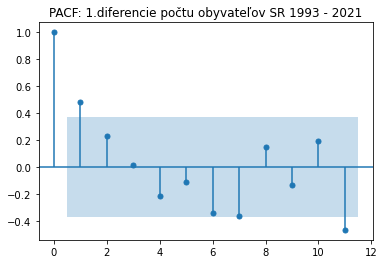

In [15]:
#PACF plot for 1st difference
title='PACF: 1.diferencie počtu obyvateľov SR 1993 - 2021'
lags=12
plot_pacf(df['d1'].dropna(),title=title,lags=np.arange(lags));  # be sure to add .dropna() here!

In [16]:
adf_test(df['d1'])

Augmented Dickey-Fuller Test: 
ADF test statistic      -2.287329
p-value                  0.176087
# lags used              2.000000
# observations          25.000000
critical value (1%)     -3.723863
critical value (5%)     -2.986489
critical value (10%)    -2.632800
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


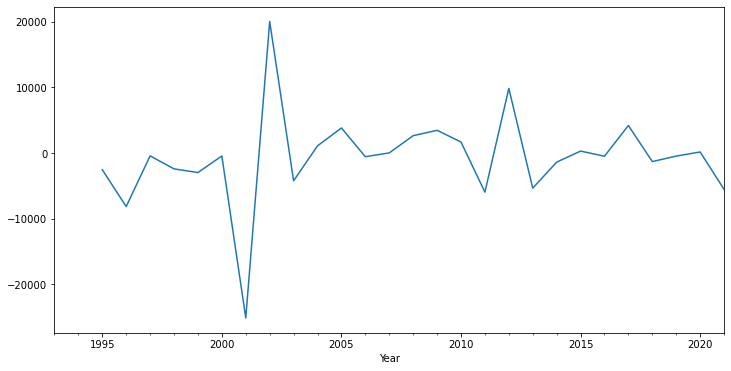

In [17]:
#Differencing data due to non stationarity - 2nd difference
df['d2'] = diff(df['Population'],k_diff=2)
df['d2'].plot(figsize=(12,6));

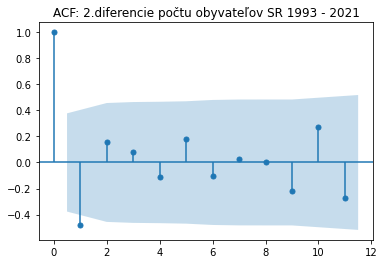

In [18]:
#ACF plot for 2nd difference
title='ACF: 2.diferencie počtu obyvateľov SR 1993 - 2021'
lags=12
plot_acf(df['d2'].dropna(),title=title,lags=np.arange(lags));  # be sure to add .dropna() here!

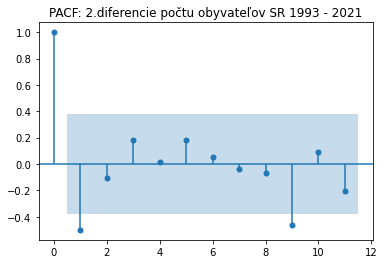

In [19]:
#PACF plot for 2nd difference
title='PACF: 2.diferencie počtu obyvateľov SR 1993 - 2021'
lags=12
plot_pacf(df['d2'].dropna(),title=title,lags=np.arange(lags));  # be sure to add .dropna() here!

In [20]:
adf_test(df['d2'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -8.299753e+00
p-value                 4.048323e-13
# lags used             0.000000e+00
# observations          2.600000e+01
critical value (1%)    -3.711212e+00
critical value (5%)    -2.981247e+00
critical value (10%)   -2.630095e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [55]:
#Running auto_arima function which measures many different models, do the differencing on its own

stepwise_fit = auto_arima(df['Population'], start_p=1, start_q=1,
                          max_p=4, max_q=4,
                          test='kpss',
                          seasonal=False,
                          trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=573.205, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=583.247, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=585.092, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=580.472, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=592.220, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=574.386, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=574.442, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=599.122, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=581.097, Time=0.03 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=611.499, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=577.401, Time=0.07 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 0.951 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   29
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -282.602
Date:                Mon, 21 Feb 2022   AIC                            573.205
Time:                        11:38:56   BIC                            578.533
Sample:                             0   HQIC                           574.834
                                 - 29                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1508.1663   1769.402      0.852      0.394   -1959.798    4976.130
ar.L1          0.5998      0.305      1.967      0.049       0.002       1.197
ma.L1         -0.5958      0.306     -1.948      0.051      -1.195       0.004
sigma2      3.293e+07      0.183    1.8e+08      0.000    3.29e+07    3.29e+07
===================================================================================
Ljung-Box (L1) (Q):                   2.56   Jarque-Bera (JB):                88.59
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):               0.14   Skew:                            -2.34
Prob(H) (two-sided):                  0.01   Kurtosis:                        10.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.91e+24. Standard errors may be unstable.
"""

In [34]:
# Splitting into train and test period
train = df.iloc[:23]
test = df.iloc[23:]

In [35]:
#Checking the best model after splitting

model = ARIMA(train['Population'],order=(1,1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Population   No. Observations:                   22
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -225.852
Method:                       css-mle   S.D. of innovations           6866.154
Date:                Sun, 20 Feb 2022   AIC                            459.704
Time:                        13:17:59   BIC                            464.068
Sample:                    01-01-1994   HQIC                           460.732
                         - 01-01-2015                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               6920.7063   4781.677      1.447      0.148   -2451.209    1.63e+04
ar.L1.D.Population     0.8121      0.177      4.598      0.000       0.466       1.158
ma.L1.D.Population    -0.3368      0.220     -1.534      0.125      -0.767       0.094
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2313           +0.0000j            1.2313            0.0000
MA.1            2.9687           +0.0000j            2.9687            0.0000
-----------------------------------------------------------------------------
"""

In [36]:
#Predictions calculation
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(1,1,1) Test predictions')

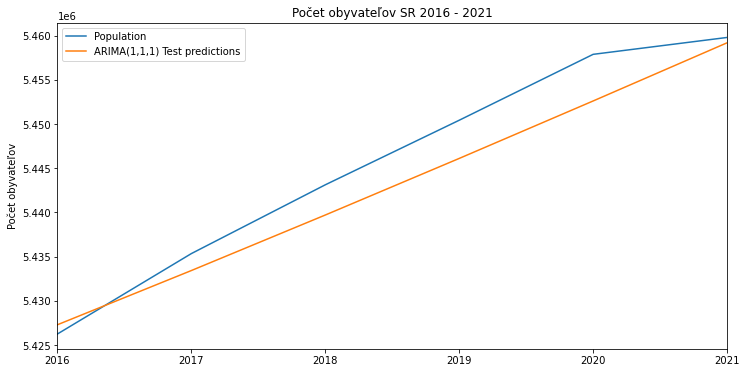

In [37]:
#Plotting predictions vs. expected data
title = 'Počet obyvateľov SR 2016 - 2021'
ylabel='Počet obyvateľov'
xlabel='' # we don't really need a label here

ax = test['Population'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [38]:
# predicted vs. expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['Population'][i]}")

predicted=5427295.787, expected=5426252
predicted=5433425.53 , expected=5435343
predicted=5439703.86 , expected=5443120
predicted=5446102.863, expected=5450421
predicted=5452599.871, expected=5457873
predicted=5459176.472, expected=5459781


In [44]:
#MSE and RMSE calculation
error = mse(test['Population'], predictions)
print(f'ARIMA(1,1,1) MSE Error: {error:11.10}')
error = rmse(test['Population'], predictions)
print(f'ARIMA(1,1,1) RMSE Error: {error:11.10}')

ARIMA(1,1,1) MSE Error:  10542308.5
ARIMA(1,1,1) RMSE Error:  3246.89213


In [45]:
#Retraining the model on full dataset
model = ARIMA(df['Population'],order=(1,1,1))
results = model.fit()
forecast = results.predict(len(df),len(df)+8,typ='levels').rename('ARIMA(1,1,1) Forecast')

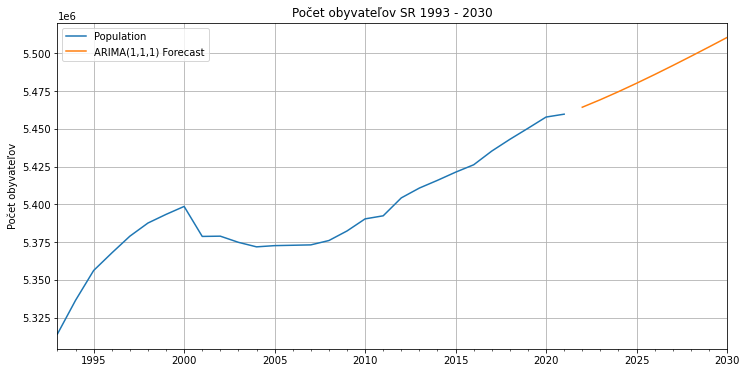

In [48]:
# Plot predictions against known values
title = 'Počet obyvateľov SR 1993 - 2030'
ylabel='Počet obyvateľov'
xlabel='' # we don't really need a label here

ax = df['Population'].plot(legend=True, grid=True, figsize=(12,6),title=title)
forecast.plot(legend=True, grid=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [42]:
forecast

2022-01-01    5.464378e+06
2023-01-01    5.469371e+06
2024-01-01    5.474685e+06
2025-01-01    5.480259e+06
2026-01-01    5.486044e+06
2027-01-01    5.492000e+06
2028-01-01    5.498094e+06
2029-01-01    5.504300e+06
2030-01-01    5.510598e+06
Freq: AS-JAN, Name: ARIMA(1,2,0) Forecast, dtype: float64